In [1]:
import torch
import torch.nn as nn
import numpy as np
from part1.vanilla_rnn import VanillaRNN
from part1.train import train

import matplotlib.pyplot as plt

### Task 1.3 Testing out RNN

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Define a configuration object, matching the structure expected by `train`
class Config:
    def __init__(self,
                  model_type="RNN", 
                  input_length=10, 
                  input_dim=1, 
                  num_classes=10, 
                  num_hidden=128, 
                  batch_size=128,
                  learning_rate=0.001,
                  train_steps=10000,
                  max_norm = 10.0,
                  device="cpu"
                  ):
        self.model_type = model_type
        self.input_length = input_length
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.num_hidden = num_hidden
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.train_steps = train_steps
        self.max_norm = max_norm
        self.device = device

In [4]:
# Create models for palindromes with increasing length
print("Training RNN with Palindrome length of 5")
config5 = Config(input_length=5, device=device)
model5, accuracies5 = train(config5)

print("Training RNN with Palindrome length of 6")
config6 = Config(input_length=6, device=device)
model6, accuracies6 = train(config6)

print("Training RNN with Palindrome length of 7")
config7 = Config(input_length=7, device=device)
model7, accuracies7 = train(config7)

print("Training RNN with Palindrome length of 8")
config8 = Config(input_length=8, device=device)
model8, accuracies8 = train(config8)

print("Training RNN with Palindrome length of 9")
config9 = Config(input_length=9, device=device)
model9, accuracies9 = train(config9)

print("Training RNN with Palindrome length of 10")
config10 = Config(input_length=10, device=device)
model10, accuracies10 = train(config10)

Training RNN with Palindrome length of 5
Chosen model type: RNN


p:\Masterstudium\SS24\GenAIVisSynth\tutorial\9tutorial\part1\train.py:82: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)


[2024-06-27 21:59] Train Step 0000/10000, Batch Size = 128, Examples/Sec = 920.61, Accuracy = 0.19, Loss = 12.561
[2024-06-27 21:59] Train Step 1000/10000, Batch Size = 128, Examples/Sec = 32008.04, Accuracy = 0.87, Loss = 0.318
[2024-06-27 21:59] Train Step 2000/10000, Batch Size = 128, Examples/Sec = 25595.75, Accuracy = 1.00, Loss = 0.028
[2024-06-27 21:59] Train Step 3000/10000, Batch Size = 128, Examples/Sec = 43415.08, Accuracy = 0.99, Loss = 0.026
[2024-06-27 21:59] Train Step 4000/10000, Batch Size = 128, Examples/Sec = 42673.15, Accuracy = 0.93, Loss = 0.257
[2024-06-27 21:59] Train Step 5000/10000, Batch Size = 128, Examples/Sec = 32004.23, Accuracy = 1.00, Loss = 0.013
[2024-06-27 21:59] Train Step 6000/10000, Batch Size = 128, Examples/Sec = 32023.32, Accuracy = 0.97, Loss = 0.064
[2024-06-27 22:00] Train Step 7000/10000, Batch Size = 128, Examples/Sec = 31981.35, Accuracy = 1.00, Loss = 0.002
[2024-06-27 22:00] Train Step 8000/10000, Batch Size = 128, Examples/Sec = 42652.

In [5]:
def average_accuracies(accuracies, training_steps):
  step_size = training_steps // 10
  range = np.arange(0, len(accuracies)-step_size, step_size)
  accuracies_avg = [np.mean(accuracies[i:i+step_size])*100 for i in range]
  return accuracies_avg


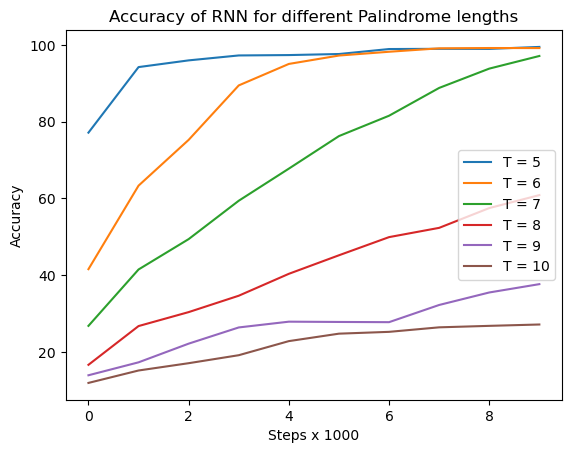

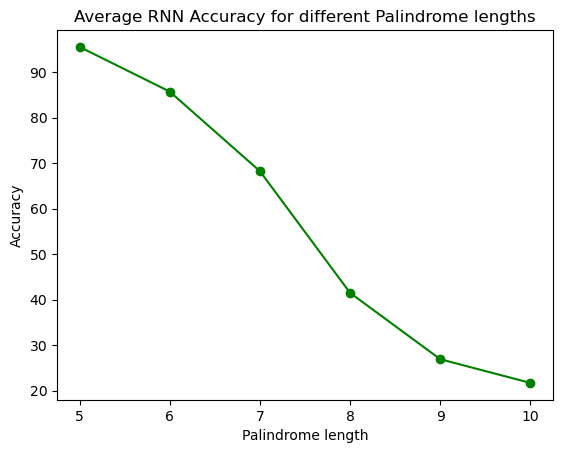

In [20]:
accuracies5_avg = average_accuracies(accuracies5, config5.train_steps)
accuracies6_avg = average_accuracies(accuracies6, config6.train_steps)
accuracies7_avg = average_accuracies(accuracies7, config7.train_steps)
accuracies8_avg = average_accuracies(accuracies8, config8.train_steps)
accuracies9_avg = average_accuracies(accuracies9, config9.train_steps)
accuracies10_avg = average_accuracies(accuracies10, config10.train_steps)

plt.plot(accuracies5_avg, label="T = 5")
plt.plot(accuracies6_avg, label="T = 6")
plt.plot(accuracies7_avg, label="T = 7")
plt.plot(accuracies8_avg, label="T = 8")
plt.plot(accuracies9_avg, label="T = 9")
plt.plot(accuracies10_avg, label="T = 10")
plt.xlabel(f"Steps x 1000")
plt.ylabel("Accuracy")
plt.title("Accuracy of RNN for different Palindrome lengths")
plt.legend()
plt.show()

# Plot accuracy x palindrome length plot
palindrome_accuracies = [
  np.mean(accuracies5)*100, 
  np.mean(accuracies6)*100,
  np.mean(accuracies7)*100,
  np.mean(accuracies8)*100,
  np.mean(accuracies9)*100,
  np.mean(accuracies10)*100
  ]

plt.plot(range(5,11), palindrome_accuracies, "-go")
plt.xlabel("Palindrome length")
plt.ylabel("Accuracy")
plt.title("Average RNN Accuracy for different Palindrome lengths")
plt.show()

One can clearly see, that the RNN performs worse and worse with longer Palindrome lengths. An interesting finding is that it seems to perform better for uneven lengths than for even lengths. For example is the accuracy of T=7 with ~ 80% higher than the accuracy of T=6 with ~ 70%
This might also be due to the model not yet completely converging.

In [7]:
torch.save(model5.state_dict(), 'model5_RNN.pth')
torch.save(model6.state_dict(), 'model6_RNN.pth')
torch.save(model7.state_dict(), 'model7_RNN.pth')
torch.save(model8.state_dict(), 'model8_RNN.pth')
torch.save(model9.state_dict(), 'model9_RNN.pth')
torch.save(model10.state_dict(), 'model10_RNN.pth')

### Task 1.4 Benefits of momentum and adaptive learning rate

**momentum:** Momentum makes it harder for a weight update to change the direction and instead drives it in the general direction of the last couple of gradients. This makes jittering towards the local optima less strong and thus makes the model converge faster. 

**adaptive learning rate:** The adaptive learning rate allows the model to always learn effectively, no matter if the model is currently in a very flat target space or very steep target space. If the gradients are very small, then the learning rate will be automatically increase, which will make sure that the model continues to learn. If the gradients get very big, then the learning rate will automatically decrease, to avoid overshooting the local optima within 1 update step. This also adds to a faster convergence and more stable training.

# Task 2: LSTMs

### Task 1.5 Theory behind LSTMs

#### Subtask a

**input modulation gate g(t):** The purpose of the input modulation gate is to apply a non-linear transformation (tanh) to the current input x(t) and h(t-1). The output of g(t) is a vector of candidates to be added to the cell state. The nonlinearity is important, so that the network is able to learn


**input gate i(t):** The purpose of the input gate is to decide what and how much of x(t) and h(t-1) should be added to the cell state. For that it employs the sigmoid function which scales the input from 0 to 1 thus deciding how much of each value in g(t) should be added to the cell state 


**forget gate f(t):** The purpose of the forget gate is to decide what parts and how much of the cell state we should forget. For that they use a sigmoid function to introduce nonlinearity and scale the output between 0 and 1 for the forget gate. This especially makes sense, since the output of the forget gate will be multiplied elementwise with the cell state thus deciding for each of the elements of the cell state, how relevant they still are

**output gate o(t):** The purpose of the output gate is to decide what part of the cell state should be part of the output h(t). For that it again uses the sigmoid function on the input x(t) and h(t-1). The input and last hidden state influence what parts of the cell state should be transported to the next hidden state


#### Subtask b
- T = sequence length => no effect on number of weights
- d = feature dimensionality (input dim)
- n = number of units (hidden dim)
- m = batch size => no effect on number of weights
- p = output dimensionality

x = d

h = n

**Parameters:**

- W_gx = n * d 
- W_gh = n * n
- b_g = n

- W_ix = n * d
- W_ih = n * n
- b_i = n

- W_fx = n * d
- W_fh = n * n
- b_f = n

- W_ox = n * d
- W_oh = n * n
- b_o = n

- W_ph = p * n
- b_p = p

**Parameter formula:**

$$
4 \cdot (n \cdot d + n \cdot n + n) + p \cdot n + p
$$


### Task 1.6 Implement LSTM network
=> View lstm.py

In [8]:
print("Training LSTM with Palindrome length of 5")
config5_lstm = Config(model_type="LSTM", input_length=5, device=device)
model5_lstm, accuracies5_lstm = train(config5_lstm)

print("Training LSTM with Palindrome length of 6")
config6_lstm = Config(model_type="LSTM", input_length=6, device=device)
model6_lstm, accuracies6_lstm = train(config6_lstm)

print("Training LSTM with Palindrome length of 7")
config7_lstm = Config(model_type="LSTM", input_length=7, device=device)
model7_lstm, accuracies7_lstm = train(config7_lstm)

print("Training LSTM with Palindrome length of 8")
config8_lstm = Config(model_type="LSTM", input_length=8, device=device)
model8_lstm, accuracies8_lstm = train(config8_lstm)

print("Training LSTM with Palindrome length of 9")
config9_lstm = Config(model_type="LSTM", input_length=9, device=device)
model9_lstm, accuracies9_lstm = train(config9_lstm)

print("Training LSTM with Palindrome length of 10")
config10_lstm = Config(model_type="LSTM", input_length=10, device=device)
model10_lstm, accuracies10_lstm = train(config10_lstm)

Training LSTM with Palindrome length of 5
Chosen model type: LSTM


p:\Masterstudium\SS24\GenAIVisSynth\tutorial\9tutorial\part1\train.py:82: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)


[2024-06-27 22:07] Train Step 0000/10000, Batch Size = 128, Examples/Sec = 4929.67, Accuracy = 0.16, Loss = 8.463
[2024-06-27 22:08] Train Step 1000/10000, Batch Size = 128, Examples/Sec = 7529.43, Accuracy = 1.00, Loss = 0.005
[2024-06-27 22:08] Train Step 2000/10000, Batch Size = 128, Examples/Sec = 12801.23, Accuracy = 1.00, Loss = 0.000
[2024-06-27 22:08] Train Step 3000/10000, Batch Size = 128, Examples/Sec = 7999.75, Accuracy = 1.00, Loss = 0.000
[2024-06-27 22:08] Train Step 4000/10000, Batch Size = 128, Examples/Sec = 12799.71, Accuracy = 1.00, Loss = 0.000
[2024-06-27 22:08] Train Step 5000/10000, Batch Size = 128, Examples/Sec = 12798.49, Accuracy = 1.00, Loss = 0.000
[2024-06-27 22:08] Train Step 6000/10000, Batch Size = 128, Examples/Sec = 12840.42, Accuracy = 1.00, Loss = 0.000
[2024-06-27 22:09] Train Step 7000/10000, Batch Size = 128, Examples/Sec = 14222.88, Accuracy = 1.00, Loss = 0.000
[2024-06-27 22:09] Train Step 8000/10000, Batch Size = 128, Examples/Sec = 12761.98

In [9]:
torch.save(model5_lstm.state_dict(), 'model5_LSTM.pth')
torch.save(model6_lstm.state_dict(), 'model6_LSTM.pth')
torch.save(model7_lstm.state_dict(), 'model7_LSTM.pth')
torch.save(model8_lstm.state_dict(), 'model8_LSTM.pth')
torch.save(model9_lstm.state_dict(), 'model9_LSTM.pth')
torch.save(model10_lstm.state_dict(), 'model10_LSTM.pth')

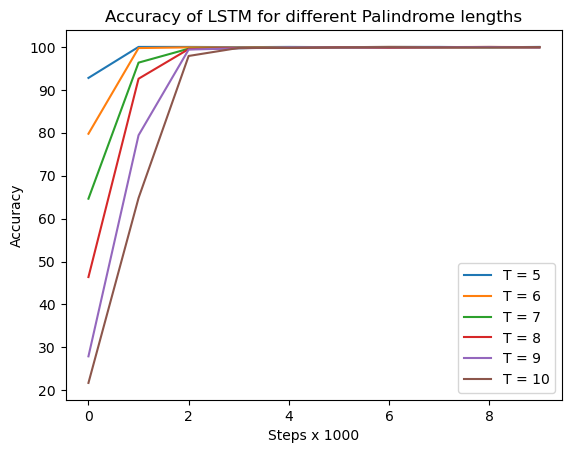

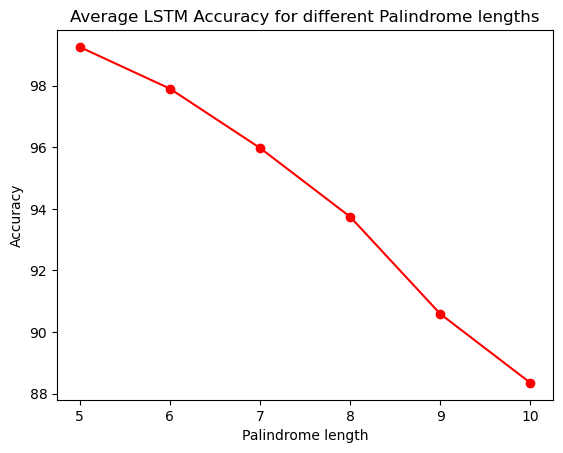

In [19]:
accuracies5_lstm_avg = average_accuracies(accuracies5_lstm, config5_lstm.train_steps)
accuracies6_lstm_avg = average_accuracies(accuracies6_lstm, config6_lstm.train_steps)
accuracies7_lstm_avg = average_accuracies(accuracies7_lstm, config7_lstm.train_steps)
accuracies8_lstm_avg = average_accuracies(accuracies8_lstm, config8_lstm.train_steps)
accuracies9_lstm_avg = average_accuracies(accuracies9_lstm, config9_lstm.train_steps)
accuracies10_lstm_avg = average_accuracies(accuracies10_lstm, config10_lstm.train_steps)

plt.plot(accuracies5_lstm_avg, label="T = 5")
plt.plot(accuracies6_lstm_avg, label="T = 6")
plt.plot(accuracies7_lstm_avg, label="T = 7")
plt.plot(accuracies8_lstm_avg, label="T = 8")
plt.plot(accuracies9_lstm_avg, label="T = 9")
plt.plot(accuracies10_lstm_avg, label="T = 10")
plt.xlabel(f"Steps x 1000")
plt.ylabel("Accuracy")
plt.title("Accuracy of LSTM for different Palindrome lengths")
plt.legend()
plt.show()

# Plot accuracy x palindrome length plot
palindrome_lstm_accuracies = [
  np.mean(accuracies5_lstm)*100, 
  np.mean(accuracies6_lstm)*100,
  np.mean(accuracies7_lstm)*100,
  np.mean(accuracies8_lstm)*100,
  np.mean(accuracies9_lstm)*100,
  np.mean(accuracies10_lstm)*100
  ]

plt.plot(range(5,11), palindrome_lstm_accuracies, "-ro")
plt.xlabel("Palindrome length")
plt.ylabel("Accuracy")
plt.title("Average LSTM Accuracy for different Palindrome lengths")
plt.show()

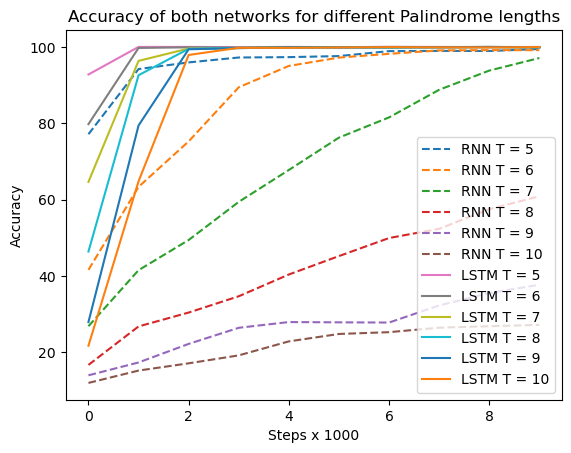

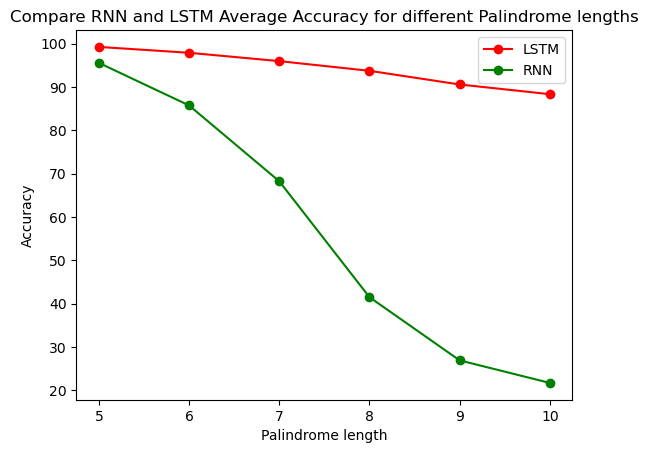

In [21]:
plt.plot(accuracies5_avg, '--', label="RNN T = 5")
plt.plot(accuracies6_avg, '--', label="RNN T = 6")
plt.plot(accuracies7_avg, '--', clip_on=True, label="RNN T = 7")
plt.plot(accuracies8_avg, '--', label="RNN T = 8")
plt.plot(accuracies9_avg, '--', label="RNN T = 9")
plt.plot(accuracies10_avg, '--', label="RNN T = 10")
plt.plot(accuracies5_lstm_avg, label="LSTM T = 5")
plt.plot(accuracies6_lstm_avg, label="LSTM T = 6")
plt.plot(accuracies7_lstm_avg, label="LSTM T = 7")
plt.plot(accuracies8_lstm_avg, label="LSTM T = 8")
plt.plot(accuracies9_lstm_avg, label="LSTM T = 9")
plt.plot(accuracies10_lstm_avg, label="LSTM T = 10")
plt.xlabel(f"Steps x 1000")
plt.ylabel("Accuracy")
plt.title("Accuracy of both networks for different Palindrome lengths")
plt.legend()
plt.show()

plt.plot(range(5,11), palindrome_lstm_accuracies, "-ro", label="LSTM")
plt.plot(range(5,11), palindrome_accuracies, "-go", label="RNN")
plt.xlabel("Palindrome length")
plt.ylabel("Accuracy")
plt.title("Compare RNN and LSTM Average Accuracy for different Palindrome lengths")
plt.legend()
plt.show()

### Comparison RNN LSTM

- RNN trains way faster than LSTM, since it has way less parameters
- RNN performs around the same good as LSTM for Palindrome lengths of T=5, but then starts to fall off while the LSTM continues to perform well.

**Reasons**

- The RNN fails to store the information in the hidden state for increasing palindrome length due to vanishing gradient. 
- Thanks to the cell state, the LSTM can pass information from early layers very easily to late neurons. Since for this test, the first digit is crucial for the last digit, the LSTM will perform especially good here.
